# loading Packages

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import Imputer
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.graphics.api as smg
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
car= pd.read_csv("cars.csv")

# Superficial Look at Data

In [4]:
car.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [5]:
car.shape

(398, 8)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [8]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [9]:
car.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


# Data Cleaning

In [73]:
car.isnull().drop_duplicates()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,False,False,False,False,False,False,False,False


In [74]:
(car['hp']=='?').drop_duplicates()

0     False
32     True
Name: hp, dtype: bool

In [75]:
car1=car[car['hp']!='?']

In [76]:
 imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)  
 imputer = imputer.fit(car1.iloc[:,1:7])
 car1.iloc[:,1:7]= imputer.transform(car1.iloc[:,1:7])

E:\Python3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# EDA

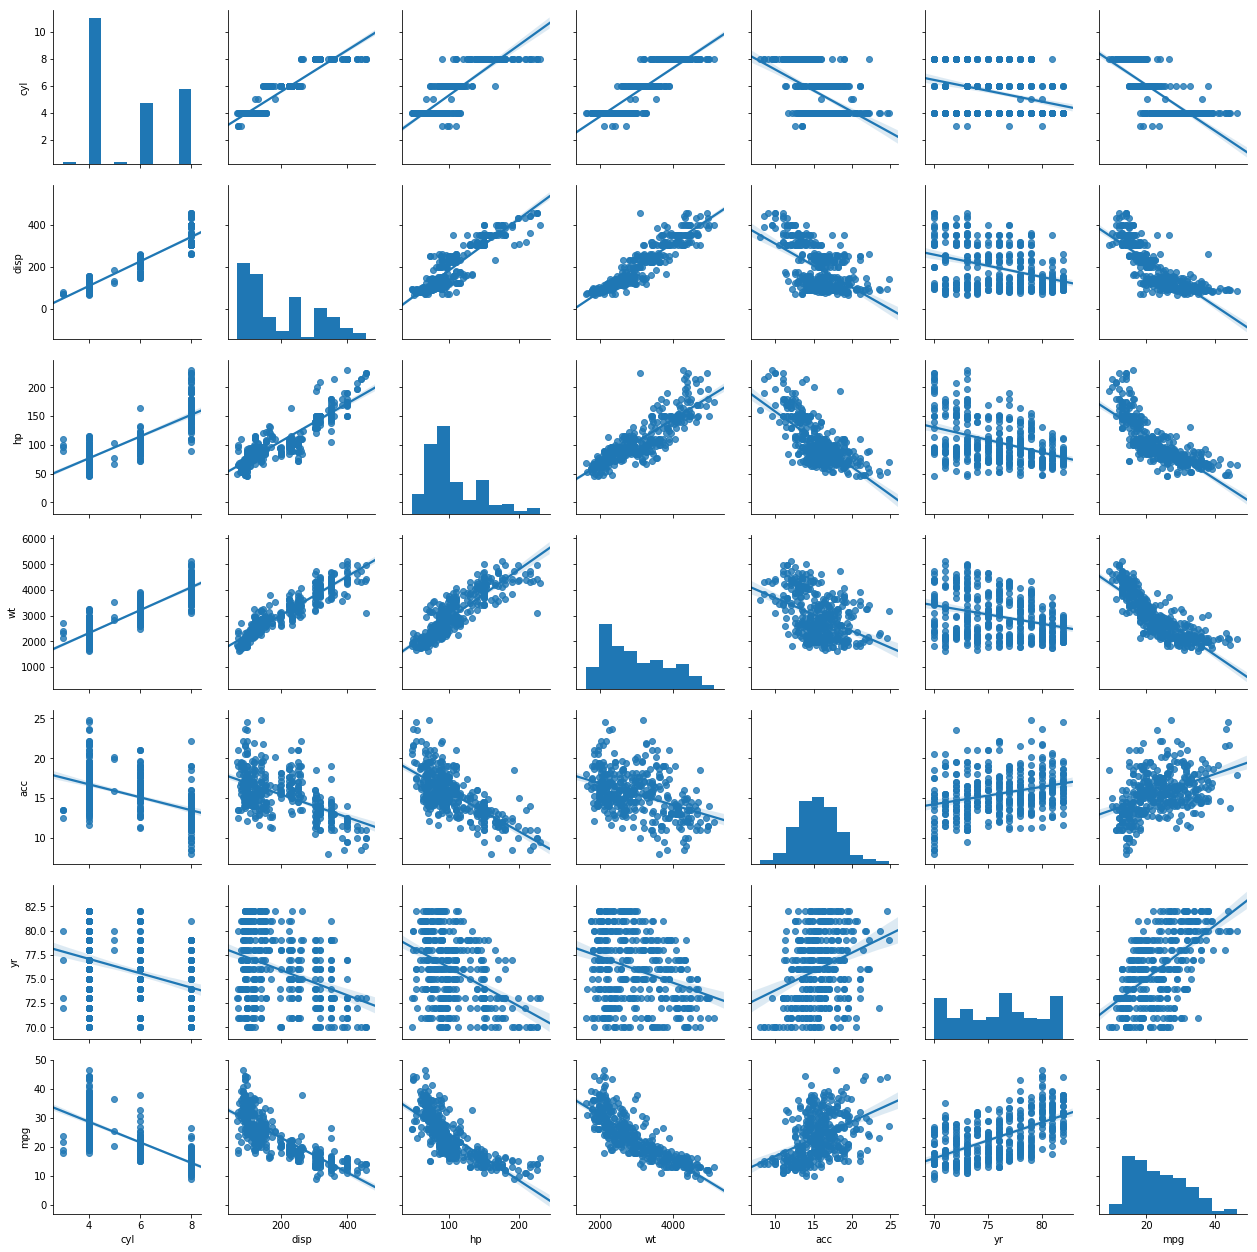

In [77]:
sns.pairplot(car1, kind="reg")

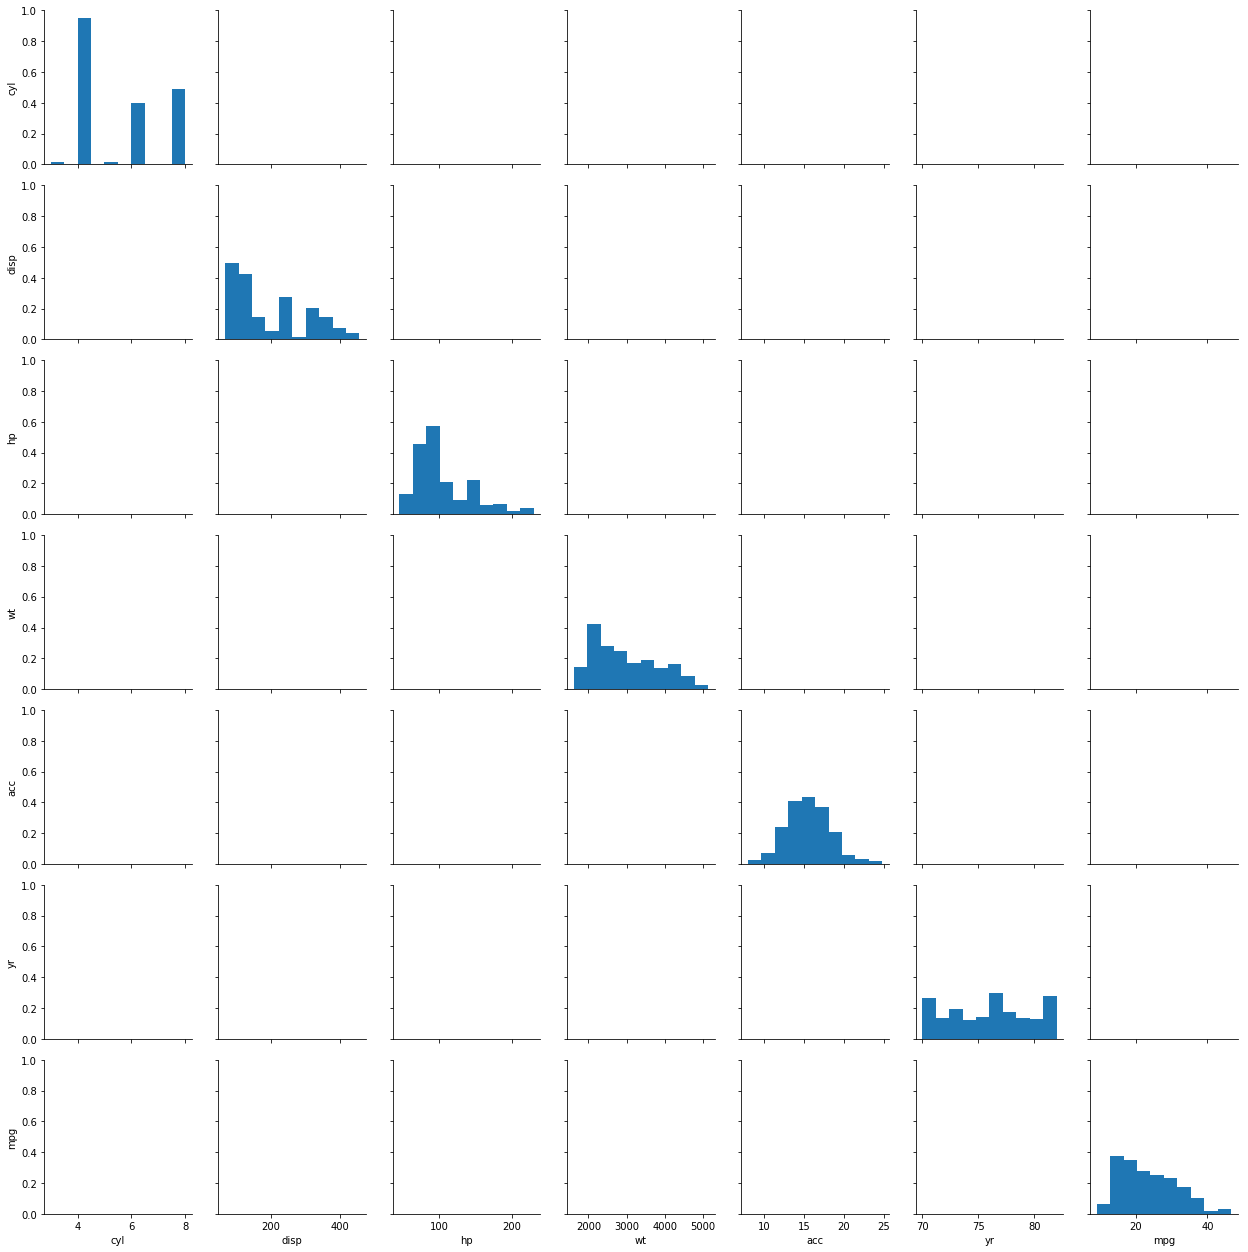

In [78]:
sns.pairplot(car1, kind="kde")

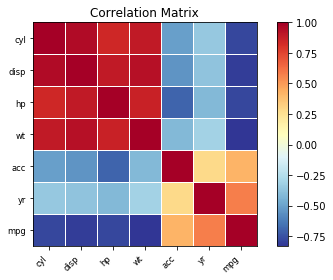

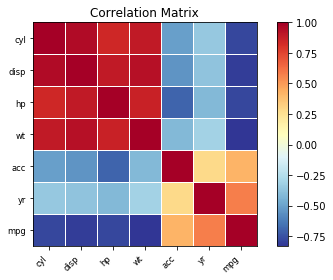

In [79]:
corr=car1.corr()
smg.plot_corr(corr, xnames=list(corr.columns))

# feature engineering

In [80]:
car1=car1.drop_duplicates()

In [81]:
car1.shape

(392, 8)

In [82]:
carclstr= car1.iloc[:,1:6]

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [84]:
 #X= StandardScaler().fit_transform(carclstr)
X= MinMaxScaler().fit_transform(carclstr)

In [85]:
clstrdata=pd.DataFrame(X)

In [86]:
clstrdata.head()

,0,1,2,3,4
0,1.0,0.617571,0.456522,0.536150,0.238095
1,1.0,0.728682,0.646739,0.589736,0.208333
2,1.0,0.645995,0.565217,0.516870,0.178571
3,1.0,0.609819,0.565217,0.516019,0.238095
4,1.0,0.604651,0.510870,0.520556,0.148810


In [87]:
for i in range(clstrdata.shape[1]):
    for x in range(clstrdata.shape[0]):
        if clstrdata.iloc[x,i]<(clstrdata.iloc[:,i].quantile(0.25)- (1.5*scs.iqr(clstrdata.iloc[:,i]))):
            clstrdata.iloc[x,i]=(clstrdata.iloc[:,i].quantile(0.25)- (1.5*scs.iqr(clstrdata.iloc[:,i])))
        elif clstrdata.iloc[x,i]>(clstrdata.iloc[:,i].quantile(0.25)+(1.5*scs.iqr(clstrdata.iloc[:,i]))):
            clstrdata.iloc[x,i]=(clstrdata.iloc[:,i].quantile(0.25)+(1.5*scs.iqr(clstrdata.iloc[:,i])))
        else:
            clstrdata.iloc[x,i]=clstrdata.iloc[x,i]

In [88]:
clstrdata.shape

(392, 5)

# Clustering

In [89]:
sse = {}
clstrdata1=clstrdata.copy()
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(clstrdata1)
    clstrdata1["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ 

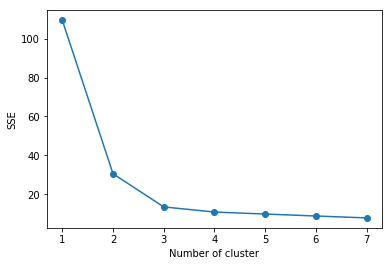

In [90]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [91]:
clstrdata2=clstrdata.copy()

In [92]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(clstrdata2)

In [93]:
clstrdata.head()

,0,1,2,3,4
0,1.0,0.617571,0.456522,0.536150,0.238095
1,1.0,0.728682,0.573370,0.589736,0.208333
2,1.0,0.645995,0.565217,0.516870,0.178571
3,1.0,0.609819,0.565217,0.516019,0.238095
4,1.0,0.604651,0.510870,0.520556,0.148810


In [94]:
clstrdata2.head()

,0,1,2,3,4
0,1.0,0.617571,0.456522,0.536150,0.238095
1,1.0,0.728682,0.573370,0.589736,0.208333
2,1.0,0.645995,0.565217,0.516870,0.178571
3,1.0,0.609819,0.565217,0.516019,0.238095
4,1.0,0.604651,0.510870,0.520556,0.148810


In [95]:
clstrdata['ClusterID']= kmeans.predict(clstrdata.iloc[:,0:6])

In [96]:
car2=car1.copy()

In [97]:
car2['ClusterID']= kmeans.predict(clstrdata.iloc[:,0:5])

In [98]:
car2.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,ClusterID
0,chevrolet chevelle malibu,8.0,307.0,130.0,3504.0,12.0,70.0,18.0,2
1,buick skylark 320,8.0,350.0,165.0,3693.0,11.5,70.0,15.0,2
2,plymouth satellite,8.0,318.0,150.0,3436.0,11.0,70.0,18.0,2
3,amc rebel sst,8.0,304.0,150.0,3433.0,12.0,70.0,16.0,2
4,ford torino,8.0,302.0,140.0,3449.0,10.5,70.0,17.0,2


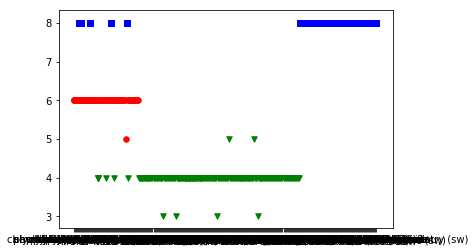

In [99]:
colors=['r','g','b','y','c','m']
markers= ['o','v','s','p',5,6]
fig, ax= plt.subplots()
c=np.array([3,3])

for i in range(0,5):
    points= np.array(car2.loc[car2['ClusterID']==i])
    ax.scatter(points[:,0],points[:,1], s=30, c=colors[i], marker=markers[i])

# Studying the features of the culsters thus created

In [100]:
clstrdata[clstrdata['ClusterID']==0].shape

(85, 6)

In [101]:
car2[car2['ClusterID']==0].head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,ClusterID
15,plymouth duster,6.0,198.0,95.0,2833.0,15.5,70.0,22.0,0
16,amc hornet,6.0,199.0,97.0,2774.0,15.5,70.0,18.0,0
17,ford maverick,6.0,200.0,85.0,2587.0,16.0,70.0,21.0,0
24,amc gremlin,6.0,199.0,90.0,2648.0,15.0,70.0,21.0,0
33,amc gremlin,6.0,232.0,100.0,2634.0,13.0,71.0,19.0,0


In [102]:
clstrdata[clstrdata['ClusterID']==1].shape

(205, 6)

In [103]:
car2[car2['ClusterID']==1].head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,ClusterID
14,toyota corona mark ii,4.0,113.0,95.0,2372.0,15.0,70.0,24.0,1
18,datsun pl510,4.0,97.0,88.0,2130.0,14.5,70.0,27.0,1
19,volkswagen 1131 deluxe sedan,4.0,97.0,46.0,1835.0,20.5,70.0,26.0,1
20,peugeot 504,4.0,110.0,87.0,2672.0,17.5,70.0,25.0,1
21,audi 100 ls,4.0,107.0,90.0,2430.0,14.5,70.0,24.0,1


In [104]:
clstrdata[clstrdata['ClusterID']==2].shape

(102, 6)

In [105]:
car2[car2['ClusterID']==2].head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,ClusterID
0,chevrolet chevelle malibu,8.0,307.0,130.0,3504.0,12.0,70.0,18.0,2
1,buick skylark 320,8.0,350.0,165.0,3693.0,11.5,70.0,15.0,2
2,plymouth satellite,8.0,318.0,150.0,3436.0,11.0,70.0,18.0,2
3,amc rebel sst,8.0,304.0,150.0,3433.0,12.0,70.0,16.0,2
4,ford torino,8.0,302.0,140.0,3449.0,10.5,70.0,17.0,2


In [106]:
centroids= kmeans.cluster_centers_
print(centroids)

[[0.60235294 0.38872169 0.29849744 0.45237913 0.48728992]
 [0.19804878 0.10621416 0.17802227 0.19836661 0.48826945]
 [1.         0.68465636 0.53862958 0.68408829 0.29014939]]


In [107]:
car2.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,ClusterID
0,chevrolet chevelle malibu,8.0,307.0,130.0,3504.0,12.0,70.0,18.0,2
1,buick skylark 320,8.0,350.0,165.0,3693.0,11.5,70.0,15.0,2
2,plymouth satellite,8.0,318.0,150.0,3436.0,11.0,70.0,18.0,2
3,amc rebel sst,8.0,304.0,150.0,3433.0,12.0,70.0,16.0,2
4,ford torino,8.0,302.0,140.0,3449.0,10.5,70.0,17.0,2


# Creating Dataset for Regression on the Clusters thus created

In [108]:
cardata1=car2[car2['ClusterID']==0]
cardata2=car2[car2['ClusterID']==1]
cardata3= car2[car2['ClusterID']==2]

In [109]:
cardata1.describe()

,cyl,disp,hp,wt,acc,yr,mpg,ClusterID
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0
mean,6.011765,218.435294,101.082353,3208.541176,16.369412,76.023529,20.083529,0.0
std,0.243688,32.588505,14.438055,331.136735,2.147868,3.258602,3.851309,0.0
min,5.000000,145.000000,72.000000,2472.000000,11.300000,70.000000,15.000000,0.0
25%,6.000000,199.000000,90.000000,2945.000000,15.100000,74.000000,18.000000,0.0
50%,6.000000,231.000000,100.000000,3211.000000,16.200000,76.000000,19.000000,0.0
75%,6.000000,250.000000,110.000000,3432.000000,17.700000,78.000000,21.000000,0.0
max,8.000000,262.000000,165.000000,3907.000000,22.200000,82.000000,38.000000,0.0


In [123]:
cardata1.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,ClusterID
15,plymouth duster,6.0,198.0,95.0,2833.0,15.5,70.0,22.0,0
16,amc hornet,6.0,199.0,97.0,2774.0,15.5,70.0,18.0,0
17,ford maverick,6.0,200.0,85.0,2587.0,16.0,70.0,21.0,0
24,amc gremlin,6.0,199.0,90.0,2648.0,15.0,70.0,21.0,0
33,amc gremlin,6.0,232.0,100.0,2634.0,13.0,71.0,19.0,0


In [110]:
cardata2.describe()

,cyl,disp,hp,wt,acc,yr,mpg,ClusterID
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.0
mean,3.990244,109.104878,78.756098,2312.639024,16.529756,77.019512,29.104390,1.0
std,0.171219,21.760618,14.756156,344.250217,2.405700,3.721903,5.780421,0.0
min,3.000000,68.000000,46.000000,1613.000000,11.600000,70.000000,18.000000,1.0
25%,4.000000,91.000000,68.000000,2051.000000,14.700000,74.000000,25.000000,1.0
50%,4.000000,105.000000,78.000000,2245.000000,16.100000,77.000000,28.000000,1.0
75%,4.000000,121.000000,90.000000,2572.000000,18.000000,80.000000,32.900000,1.0
max,5.000000,156.000000,115.000000,3270.000000,24.800000,82.000000,46.600000,1.0


In [111]:
cardata3.describe()

,cyl,disp,hp,wt,acc,yr,mpg,ClusterID
count,102.0,102.000000,102.000000,102.000000,102.000000,102.000000,102.00000,102.0
mean,8.0,345.843137,158.970588,4121.529412,12.864706,73.852941,14.87549,2.0
std,0.0,46.232462,27.766514,445.668453,2.035703,2.993052,2.70659,0.0
min,8.0,260.000000,105.000000,3086.000000,8.000000,70.000000,9.00000,2.0
25%,8.0,305.500000,140.500000,3823.250000,11.500000,72.000000,13.00000,2.0
50%,8.0,350.000000,150.000000,4140.500000,13.000000,73.000000,14.00000,2.0
75%,8.0,360.000000,175.000000,4412.750000,14.000000,76.000000,16.00000,2.0
max,8.0,455.000000,230.000000,5140.000000,19.000000,81.000000,26.60000,2.0


# Splitting Train and Test Dataset

In [112]:
from sklearn.model_selection import train_test_split

In [124]:
feature=cardata1.iloc[:,1:7]
target=cardata1.iloc[:,7]

In [125]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [126]:
print("feature_train= \n", feature_train.shape,
"\n feature_test= \n", feature_test.shape,
"\n target_train= \n", target_train.shape,
"\n target_test= \n", target_test.shape)

feature_train= 
 (68, 6) 
 feature_test= 
 (17, 6) 
 target_train= 
 (68,) 
 target_test= 
 (17,)


# Applying Linear Regression on the Dataset

In [120]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [127]:
regr = linear_model.LinearRegression()

In [128]:
regr.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.86588851 -0.00629373 -0.06162002 -0.00377408 -0.36750664  0.71487868]


In [131]:
cardata1.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'ClusterID'], dtype='object')

In [132]:
head= ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']

In [133]:
Coefficients=pd.DataFrame([regr.coef_], columns=head)
Coefficients

,cyl,disp,hp,wt,acc,yr
0,0.865889,-0.006294,-0.06162,-0.003774,-0.367507,0.714879


# Model Evaluation

In [157]:
#Mean Squared Error:
feature_pred = regr.predict(feature_test)
print("Mean squared error: %.2f"
      % mean_squared_error(target_test, feature_pred))

Mean squared error: 4.12


In [158]:
model2=sm.OLS(target_train,feature_train)
result=model2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     498.2
Date:                Sun, 30 Dec 2018   Prob (F-statistic):           1.78e-50
Time:                        14:01:50   Log-Likelihood:                -168.94
No. Observations:                  68   AIC:                             349.9
Df Residuals:                      62   BIC:                             363.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cyl           -0.0387      1.267     -0.031      0.9

In [160]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     498.2
Date:                Sun, 30 Dec 2018   Prob (F-statistic):           1.78e-50
Time:                        14:02:53   Log-Likelihood:                -168.94
No. Observations:                  68   AIC:                             349.9
Df Residuals:                      62   BIC:                             363.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cyl           -0.0387      1.267     -0.031      0.976      -2.571       2.494
disp          -0.0090      0.015     -0.609      0.545      -0.039       0.021
hp            -0.0639      0.039     -1.631      0.108      -0.142       0.014
wt            -0.0040      0.002     -1.923      0.059      -0.008       0.000
acc           -0.3543      0.333     -1.065      0.291      -1.019       0.311
yr             0.6235      0.094      6.627      0.000       0.435       0.812
==============================================================================
Omnibus:                       34.893   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.734
Skew:                           1.538   Prob(JB):                     4.92e-23
Kurtosis:                       8.177   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Iterating the process for all the clusters

In [161]:
feature=cardata2.iloc[:,1:7]
target=cardata2.iloc[:,7]
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)
print("feature_train= \n", feature_train.shape,
"\n feature_test= \n", feature_test.shape,
"\n target_train= \n", target_train.shape,
"\n target_test= \n", target_test.shape)
regr.fit(feature_train, target_train)

feature_train= 
 (164, 6) 
 feature_test= 
 (41, 6) 
 target_train= 
 (164,) 
 target_test= 
 (41,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [162]:
head= ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']
Coefficients=pd.DataFrame([regr.coef_], columns=head)
Coefficients

,cyl,disp,hp,wt,acc,yr
0,4.96058,-0.044878,-0.108443,-0.004739,-0.093697,0.869805


In [163]:
model2=sm.OLS(target_train,feature_train)
result=model2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2452.
Date:                Sun, 30 Dec 2018   Prob (F-statistic):          3.84e-153
Time:                        14:05:47   Log-Likelihood:                -414.26
No. Observations:                 164   AIC:                             840.5
Df Residuals:                     158   BIC:                             859.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cyl            1.6300      1.101      1.481      0.1

In [164]:
feature=cardata3.iloc[:,1:7]
target=cardata3.iloc[:,7]
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)
print("feature_train= \n", feature_train.shape,
"\n feature_test= \n", feature_test.shape,
"\n target_train= \n", target_train.shape,
"\n target_test= \n", target_test.shape)
regr.fit(feature_train, target_train)

feature_train= 
 (81, 6) 
 feature_test= 
 (21, 6) 
 target_train= 
 (81,) 
 target_test= 
 (21,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
head= ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']
Coefficients=pd.DataFrame([regr.coef_], columns=head)
Coefficients

,cyl,disp,hp,wt,acc,yr
0,0.0,0.018595,-0.025797,-0.002614,0.046863,0.452675


In [166]:
model2=sm.OLS(target_train,feature_train)
result=model2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     23.64
Date:                Sun, 30 Dec 2018   Prob (F-statistic):           3.47e-14
Time:                        14:06:37   Log-Likelihood:                -156.17
No. Observations:                  81   AIC:                             324.3
Df Residuals:                      75   BIC:                             338.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cyl           -1.3406      0.880     -1.523      0.1